## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `insurance.csv` dataset.

<b>Note: Remember to label plot axes while plotting.</b>

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
insurance_df = pd.read_csv('insurance.csv')
insurance_df

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**1.1 Create a bar chart to compare the average insurance charges by sex and region.**


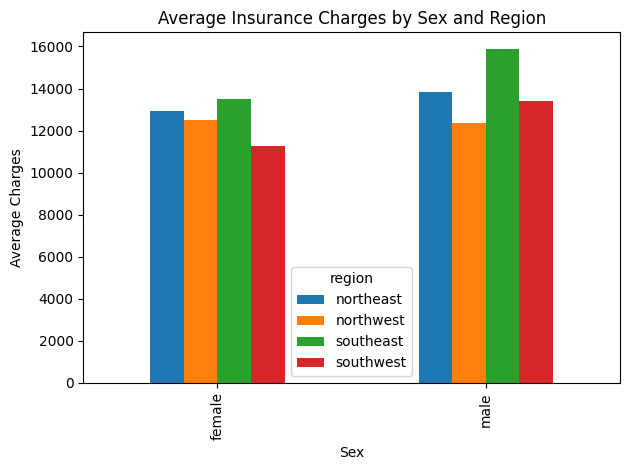

In [ ]:
### Code here
sr_data = insurance_df.groupby(['sex', 'region'])['charges'].mean().unstack()

sr_data.plot(kind='bar')

plt.title('Average Insurance Charges by Sex and Region')
plt.xlabel('Sex')
plt.ylabel('Average Charges')

plt.tight_layout()
plt.show()


In [ ]:
### Comment here
### From the bar charts, for both male and female, people from southeast spend more money on insurance than people from other regions. Generally, males spend more money
### on insurance than females.

**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **sex**
2. **region**
3. **children**
4. **smoker**

**Make subplots in the same graph**

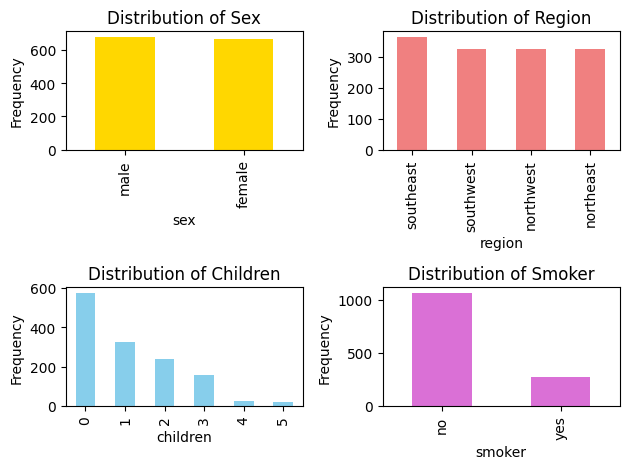

In [ ]:
### Code here
fig, axes = plt.subplots(2, 2)

insurance_df['sex'].value_counts().plot(kind='bar', ax=axes[0, 0], color='gold')
axes[0, 0].set_title('Distribution of Sex')
axes[0, 0].set_ylabel('Frequency')

insurance_df['region'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Region')
axes[0, 1].set_ylabel('Frequency')

insurance_df['children'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Distribution of Children')
axes[1, 0].set_ylabel('Frequency')

insurance_df['smoker'].value_counts().plot(kind='bar', ax=axes[1, 1], color='orchid')
axes[1, 1].set_title('Distribution of Smoker')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**1.3 Compare the insurance charges by age and smoker. Create a Scatter plot for age vs insurance charges categorize them by smoker type.**

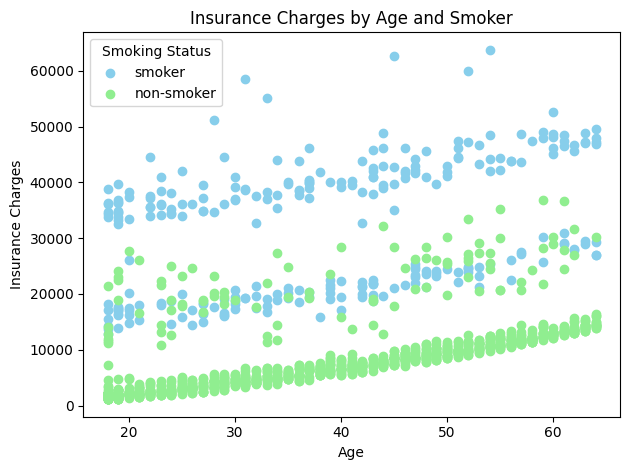

In [ ]:
### Code here
plt.figure()

plt.scatter(insurance_df[insurance_df['smoker'] == 'yes']['age'], insurance_df[insurance_df['smoker'] == 'yes']['charges'],
            color='skyblue', label= 'smoker')

plt.scatter(insurance_df[insurance_df['smoker'] == 'no']['age'], insurance_df[insurance_df['smoker'] == 'no']['charges'],
            color='lightgreen', label='non-smoker')

plt.title('Insurance Charges by Age and Smoker')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoking Status')

plt.tight_layout()
plt.show()


## **Part 2: Linear Models for Regression and Classification**

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**.

### **2.1 Linear Regression**
We will now proceed with splitting the dataset and implementing linear regression to predict `insurance charges`.

In [ ]:
# Split the dataset into features and labels
insurance_X = insurance_df.drop(columns=['charges'])
insurance_y = insurance_df['charges']

**2.1.1 Plot relationships between features (age, bmi, children, region) and the target variable `charges` as a small multiple of scatter plots.**
1. age
2. bmi
3. children
4. region

Make sure to label the axes.
<b></b>

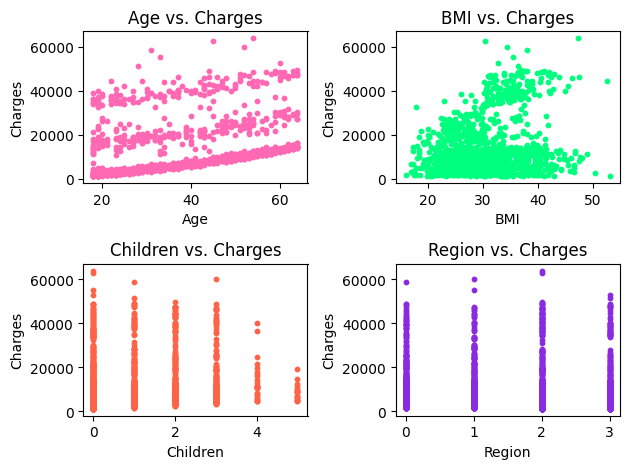

In [ ]:
### Code here
features = ['age', 'bmi', 'children', 'region']

insurance_X['region'] = insurance_X['region'].astype('category').cat.codes

fig, axes = plt.subplots(2, 2)

axes[0, 0].scatter(insurance_X['age'], insurance_y, color='hotpink', s=10)
axes[0, 0].set_title('Age vs. Charges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges')

axes[0, 1].scatter(insurance_X['bmi'], insurance_y, color='springgreen', s=10)
axes[0, 1].set_title('BMI vs. Charges')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')

axes[1, 0].scatter(insurance_X['children'], insurance_y, color='tomato', s=10)
axes[1, 0].set_title('Children vs. Charges')
axes[1, 0].set_xlabel('Children')
axes[1, 0].set_ylabel('Charges')

axes[1, 1].scatter(insurance_X['region'], insurance_y, color='blueviolet', s=10)
axes[1, 1].set_title('Region vs. Charges')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Charges')

plt.tight_layout()
plt.show()


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


In [ ]:
### Comment here
### Probably not. For Age vs. Charges, clusters around high ages demonstrate non-linear pattern. For BMI vs. Charges, the data points fail to show a strong linear
### linear pattern, especially for low BMI. For Children vs. Charges, the charges show a wide spread across the number of children, thus no clear linear pattern detected.
### For Region vs. Charges, same problem as Children vs. Charges, no strong linear pattern found.

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `sex`, `smoker`, `region`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.3 Encode the categorical variables of the Insurance dataset.**

In [ ]:
### Code here
cat_var = ['sex', 'smoker', 'region']

encode = OneHotEncoder(drop='first', sparse_output=False)
encode_cat = encode.fit_transform(insurance_df[cat_var])
encode_df = pd.DataFrame(encode_cat, columns=encode.get_feature_names_out(cat_var))
insur_encode = insurance_df.drop(columns=cat_var)
final = pd.concat([insur_encode, encode_df], axis=1)

final.head()
print(final.dtypes)


age                   int64
bmi                 float64
children              int64
charges             float64
sex_male            float64
smoker_yes          float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
dtype: object


In [ ]:
### Code here


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.8). If yes, drop one from each pair of highly correlated features from the dataframe. It is fine if you do not find any highly correlated features. Why could this be necessary before proceeding further?**

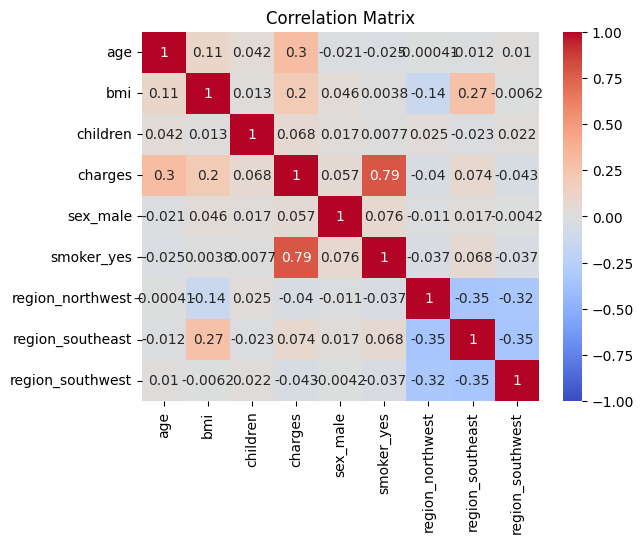

In [ ]:
### Code here
corr_matrix = final.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

high_corr = corr_matrix.abs() >= 0.8
high_pairs = high_corr.where(np.triu(high_corr, k=1)).stack().reset_index()
high_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
highly_correlated_pairs = high_pairs[high_pairs['Correlation']]


In [ ]:
### Comment here


**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [ ]:
### Code here
X_train, X_re, y_train, y_re = train_test_split(final.drop(columns=['charges']), insurance_y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_re, y_re, test_size=0.5, random_state=42)

**2.1.6 Standardize the columns in the feature matrices.**

In [ ]:
### Code here
scaler = StandardScaler()
final_scaled = scaler.fit_transform(final)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Adding a column of ones to include the bias term
X_train_scaled_bias = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_val_scaled_bias = np.hstack([np.ones((X_val_scaled.shape[0], 1)), X_val_scaled])
X_test_scaled_bias = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

# insurance_X_train = np.hstack([np.ones((insurance_X_train.shape[0], 1)), insurance_X_train])
# insurance_X_val = np.hstack([np.ones((insurance_X_val.shape[0], 1)), insurance_X_val])
# insurance_X_test = np.hstack([np.ones((insurance_X_test.shape[0], 1)), insurance_X_test])

At the end of this pre-processing, you should have the following vectors and matrices:

- **insurance_X_train**: Training set feature matrix.
- **insurance_X_val**: Validation set feature matrix.
- **insurance_X_test**: Test set feature matrix.
- **insurance_y_train**: Training set labels (insurance charges).
- **insurance_y_val**: Validation set labels.
- **insurance_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$





**2.1.7 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [ ]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        n = X.shape[1]
        I = np.eye(n)
        I[0, 0] = 0
        self.w = np.linalg.solve(X.T @ X + self.alpha * I, X.T @ y)

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return X @ self.w

**2.1.8 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the insurance dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [ ]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [ ]:
### Code here
model = LinearRegression(alpha=0)
model.train(X_train_scaled_bias, y_train)

y_train_pre = model.predict(X_train_scaled_bias)
y_val_pre = model.predict(X_val_scaled_bias)
y_test_pre = model.predict(X_test_scaled_bias)

r2_train = r2_score(y_train, y_train_pre)
r2_val = r2_score(y_val, y_val_pre)
r2_test = r2_score(y_test, y_test_pre)
print(r2_train, r2_val, r2_test)

result = get_report(y_test_pre, y_test)
print(result)

0.7422834324413088 0.7620093485062263 0.7584536162870947
            Prediction       Actual
Position                           
1         31420.384684  22478.60000
2          9022.472491   5836.52040
3         11754.829781   6373.55735
266       12825.269068  10564.88450
267       10289.283270   2927.06470
268       13409.956235   9877.60770


**2.1.9 Use the mean of the training labels (insurance_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [ ]:
### Code here
y_train_mean = np.mean(y_train)

y_train_bl = np.full_like(y_train, y_train_mean)
y_val_bl = np.full_like(y_val, y_train_mean)
y_test_bl = np.full_like(y_test, y_train_mean)

r2_train_bl = r2_score(y_train, y_train_bl)
r2_val_bl = r2_score(y_val, y_val_bl)
r2_test_bl = r2_score(y_test, y_test_bl)

print(r2_train_bl, r2_val_bl, r2_test_bl)

0.0 -0.009358678016303745 -0.006598499114822687


**2.1.10 Interpret your model trained on the insurance dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

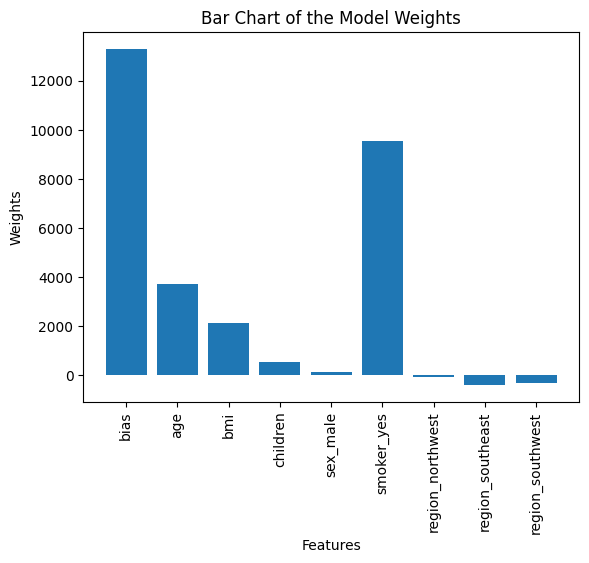

In [ ]:
### Code here
model.train(X_train_scaled_bias, y_train)
weight = model.w
feature_labels = ['bias'] + list(final.drop(columns=['charges']).columns)

plt.bar(feature_labels, weight)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Bar Chart of the Model Weights')
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to insurance charges?**

In [ ]:
### Comment here
### Besides bias (it is meaningless), "smoker_yes" has the largest positive weight, meaning that being a smoker has a grear positive impact on insurance charges.
### Age and BMI also have positive contributions to insurance charges.

### **Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the insurance dataset.

**2.1.12 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.****

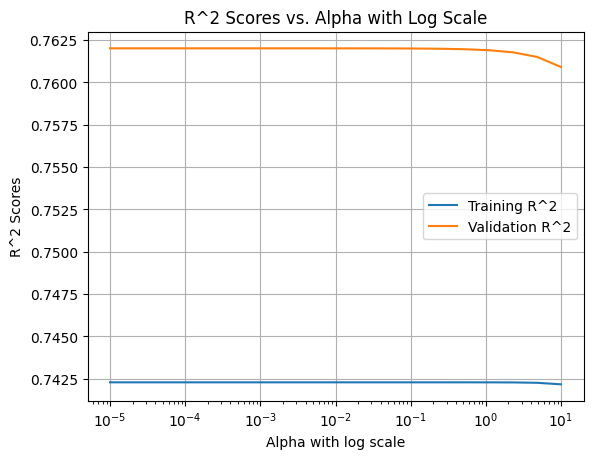

In [ ]:
### Code here
alphas = np.logspace(-5, 1, 20)

r2_train_result = []
r2_val_result = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    model.train(X_train_scaled_bias, y_train)
    y_train_pre = model.predict(X_train_scaled_bias)
    y_val_pre = model.predict(X_val_scaled_bias)

    r2_train = r2_score(y_train, y_train_pre)
    r2_val = r2_score(y_val, y_val_pre)

    r2_train_result.append(r2_train)
    r2_val_result.append(r2_val)

plt.plot(alphas, r2_train_result, label='Training R^2')
plt.plot(alphas, r2_val_result, label='Validation R^2')
plt.xscale('log')
plt.xlabel('Alpha with log scale')
plt.ylabel('R^2 Scores')
plt.title('R^2 Scores vs. Alpha with Log Scale')
plt.legend()
plt.grid(True)
plt.show()


**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

In [ ]:
### Comment here
### For training R^2, the value demonstrates a constant pattern except a bit drop as the alpha becomes large, this is because a higher alpha causes stronger regularization,
### leading to underfitting of a model. For validation R^2, it is also constant but higher than training R^2. Validation R^2 also drops as alpha becomes large due to underfitting
### of the model.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [5]:
### Code here
from google.colab import files
uploaded = files.upload()
loan_data_df = pd.read_csv('loan_data.csv')
loan_data_df

Saving loan_data.csv to loan_data (1).csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [7]:
### Code here
na = loan_data_df.isnull().sum()
na_column = na[na > 0]
na_column

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [8]:
### Code here
loan_data_df['Gender'].fillna(loan_data_df['Gender'].mode()[0], inplace=True)
loan_data_df['Married'].fillna(loan_data_df['Married'].mode()[0], inplace=True)
loan_data_df['Dependents'].fillna(loan_data_df['Dependents'].mode()[0], inplace=True)
loan_data_df['Self_Employed'].fillna(loan_data_df['Self_Employed'].mode()[0], inplace=True)
loan_data_df['Credit_History'].fillna(loan_data_df['Credit_History'].mode()[0], inplace=True)
loan_data_df['Loan_Status'].fillna(loan_data_df['Loan_Status'].mode()[0], inplace=True)

loan_data_df['LoanAmount'].fillna(loan_data_df['LoanAmount'].median(), inplace=True)
loan_data_df['Loan_Amount_Term'].fillna(loan_data_df['Loan_Amount_Term'].median(), inplace=True)

loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
### Comment here
### For categorical variables, I imputed with the mode because the mode represents the most frequent value appears in this category
### and helps maintain the distribution of the data. For numerical variables, I imputed with the median because unlike mean, median is not affected by
### outliers.

**2.2.3 Encode the categorical variables.**

In [9]:
### Code here
dependents_cat = [['0', '1', '2', '3+']]
other_cat = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

ordinal = OrdinalEncoder(categories=dependents_cat)
onehot = OneHotEncoder(drop='first', sparse_output=False)

loan_data_df['dependents_encoded'] = ordinal.fit_transform(loan_data_df[['Dependents']])
onehot_encode = onehot.fit_transform(loan_data_df[other_cat])

onehot_encode_df = pd.DataFrame(onehot_encode, columns=onehot.get_feature_names_out(other_cat))
loan_encode = pd.concat([loan_data_df, onehot_encode_df], axis=1)
loan_encode.drop(columns = other_cat + ['Dependents'], inplace=True)

loan_encode.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,dependents_encoded,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,4583,1508.0,128.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3000,0.0,66.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2583,2358.0,120.0,360.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4,6000,0.0,141.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [ ]:
### Code here
prob_cat = loan_data_df['Loan_Status'].value_counts(normalize=True)
print(prob_cat)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [ ]:
### Comment here
### Not balanced, because the probability is not 50%. The model might predict "Y" more frequently.

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

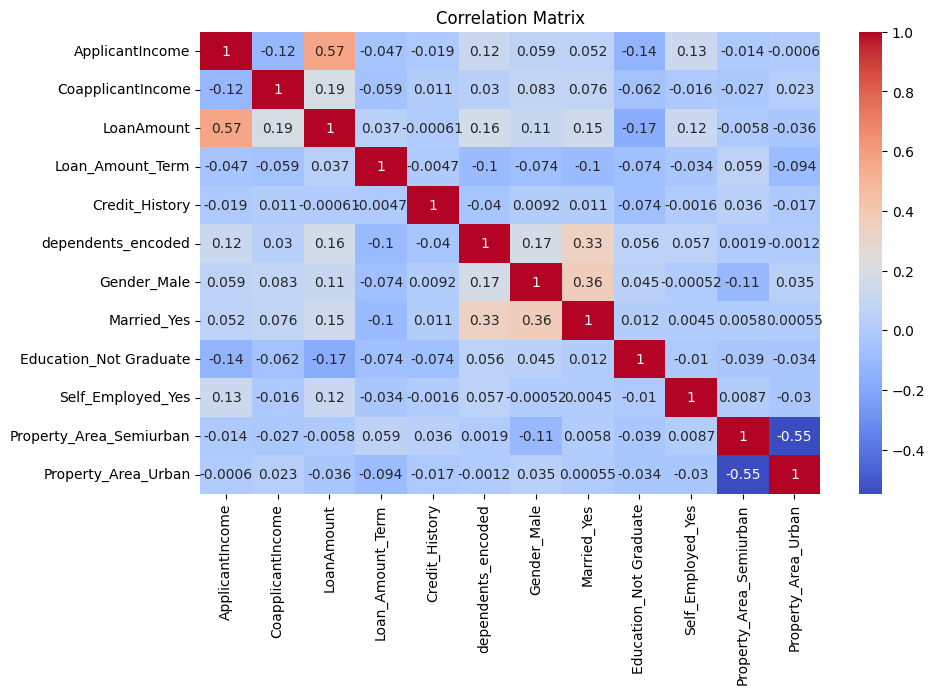

In [11]:
### Code here
x = loan_encode.drop(columns=['Loan_Status_Y'])
y = loan_encode['Loan_Status_Y']
num_x = x.select_dtypes(include=[np.number])

corr_matrix = num_x.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
### Code here



In [ ]:
### Code here


**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [12]:
### Code here
y_np = y.values.reshape(-1, 1)

x_train, x_re, y_train, y_re = train_test_split(x, y_np, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_re, y_re, test_size=0.5, random_state=42)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

x_train_final = np.hstack([np.ones((x_train_scaled.shape[0], 1)), x_train_scaled])
x_val_final = np.hstack([np.ones((x_val_scaled.shape[0], 1)), x_val_scaled])
x_test_final = np.hstack([np.ones((x_test_scaled.shape[0], 1)), x_test_scaled])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [15]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

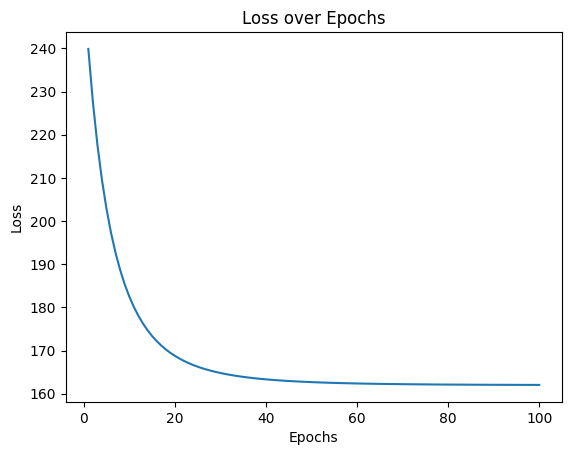

In [16]:
### Code here
model = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = model.train(x_train_final, y_train)

losses = np.array(losses).ravel()
plt.plot(range(1, 101), losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
### Code here
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_hyper = None
for _ in range(20):
    alpha = np.random.uniform(0, 1)
    eta = np.random.uniform(0, 0.001)
    t = np.random.randint(0, 100)

    model = LogisticRegression(alpha=alpha, t=t, eta=eta)
    model.train(x_train_final, y_train)
    y_pred = model.predict(x_val_final)
    accuracy = accuracy_score(y_val, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyper = (alpha, eta, t)

best_model = LogisticRegression(alpha=best_hyper[0], t=best_hyper[2], eta=best_hyper[1])
best_model.train(x_train_final, y_train)

[array([[254.97053308]]),
 array([[254.8630522]]),
 array([[254.75571959]]),
 array([[254.64853503]]),
 array([[254.54149832]]),
 array([[254.43460924]]),
 array([[254.32786758]]),
 array([[254.22127311]]),
 array([[254.11482563]]),
 array([[254.00852492]]),
 array([[253.90237078]]),
 array([[253.79636298]]),
 array([[253.69050131]]),
 array([[253.58478557]]),
 array([[253.47921553]]),
 array([[253.37379099]]),
 array([[253.26851174]]),
 array([[253.16337756]]),
 array([[253.05838825]]),
 array([[252.95354358]]),
 array([[252.84884336]]),
 array([[252.74428736]]),
 array([[252.63987539]]),
 array([[252.53560722]]),
 array([[252.43148266]]),
 array([[252.32750148]]),
 array([[252.22366348]]),
 array([[252.11996846]]),
 array([[252.0164162]]),
 array([[251.91300649]]),
 array([[251.80973912]]),
 array([[251.7066139]]),
 array([[251.6036306]]),
 array([[251.50078902]]),
 array([[251.39808896]]),
 array([[251.2955302]]),
 array([[251.19311255]]),
 array([[251.09083578]]),
 array([[250.9886

In [18]:
### Code here
y_test_1 = model.predict(x_test_final)
accuracy_1 = accuracy_score(y_test, y_test_1)

y_test_best = best_model.predict(x_test_final)
accuracy_best = accuracy_score(y_test, y_test_best)

accuracy_1, accuracy_best, best_hyper

(0.8292682926829268,
 0.8292682926829268,
 (0.17225357360455706, 6.7210226196503524e-06, 93))

In [ ]:
### Code here



### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

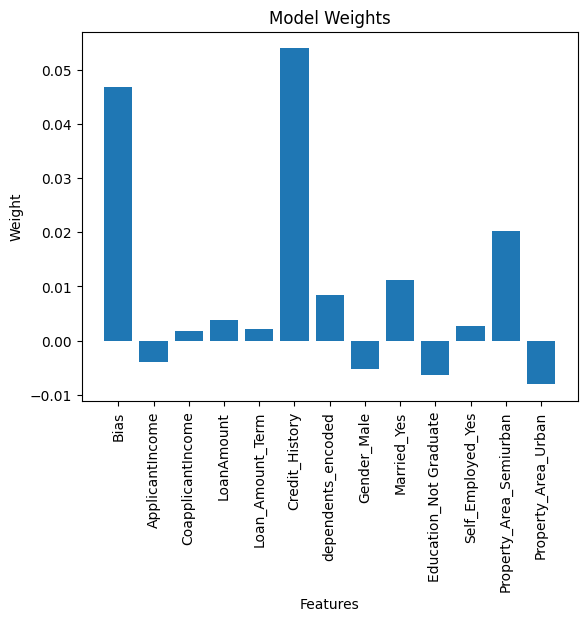

In [19]:
### Code here
weight = best_model.w.ravel()
feature_names = ['Bias'] + list(x_train.columns)
plt.bar(feature_names, weight)
plt.xticks(rotation=90)
plt.title("Model Weights")
plt.xlabel("Features")
plt.ylabel("Weight")
plt.show()

In [ ]:
### Comment here
### Besides bias, "Credit_History" and "Property_Area_Semiurban" weigh the most in this model. Both have positive contributions, meaning that people with
### a good credit history and living in semiurban region have a higher probability of loan approved. "dependents_encoded" and "Married_yes" have moderate
### weights, meaning that people having dependents and married have a higher probability of loan approved. On the other hand, "Applicantincome", "Gender_Male",
### and "Education_Not_Graduate" have low negative weight in this model, meaning that people who are male, with low income, or not a graduate have small
### negative impacts of loan approved.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [20]:
### Code here
svm_model = LinearSVC()
svm_model.fit(x_train_scaled, y_train)

y_train_pre = svm_model.predict(x_train_scaled)
y_val_pre = svm_model.predict(x_val_scaled)
y_test_pre = svm_model.predict(x_test_scaled)

acc_train = accuracy_score(y_train, y_train_pre)
acc_val = accuracy_score(y_val, y_val_pre)
acc_test = accuracy_score(y_test, y_test_pre)

acc_train, acc_val, acc_test

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.8179347826086957, 0.7642276422764228, 0.8292682926829268)

### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [21]:
### Code here
dual_svm = SVC(kernel='linear')
dual_svm.fit(x_train_scaled, y_train)

y_train_pre = dual_svm.predict(x_train_scaled)
y_val_pre = dual_svm.predict(x_val_scaled)
y_test_pre = dual_svm.predict(x_test_scaled)

acc_train = accuracy_score(y_train, y_train_pre)
acc_val = accuracy_score(y_val, y_val_pre)
acc_test = accuracy_score(y_test, y_test_pre)

acc_train, acc_val, acc_test

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.8179347826086957, 0.7642276422764228, 0.8292682926829268)